<IPython.core.display.Javascript object>


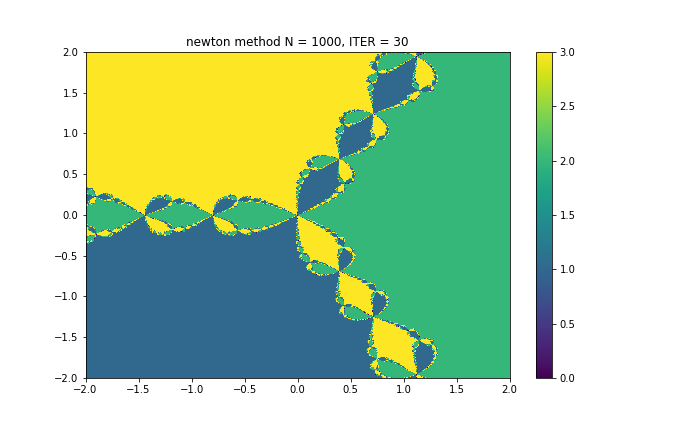

In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import newton
from util import root_attraction, eps_eq
from math import sqrt

# options
N = 1000
COUNT_ITERATION = 30
eps = 1e-15

# define function and roots
f = lambda z : z ** 3 - 1
fd= lambda z : 3 * z ** 2

roots = [
    complex(1, 0),
    complex(-1/2, sqrt(3)/2),
    complex(-1/2, -sqrt(3)/2),
]
assert all(map(lambda r: eps_eq(f(r), 0, eps), roots))

newton_method = lambda z: newton.get_root(f, fd, z, COUNT_ITERATION)

# generation plot 
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)

# Z - array NxN, which contains index of route 
# or 0 if method didn't coverge 
Z = np.array([
    root_attraction(x, y, method=newton_method, roots=roots, eps=eps) 
    for y in Y for x in X
]).reshape(N, N)


# rendering 
fig, ax = plt.subplots(linewidth=8)

c = ax.pcolormesh(X, Y, Z)
ax.set_title('newton method N = 1000, ITER = 30')
fig.colorbar(c, ax=ax)

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.show()

<IPython.core.display.Javascript object>


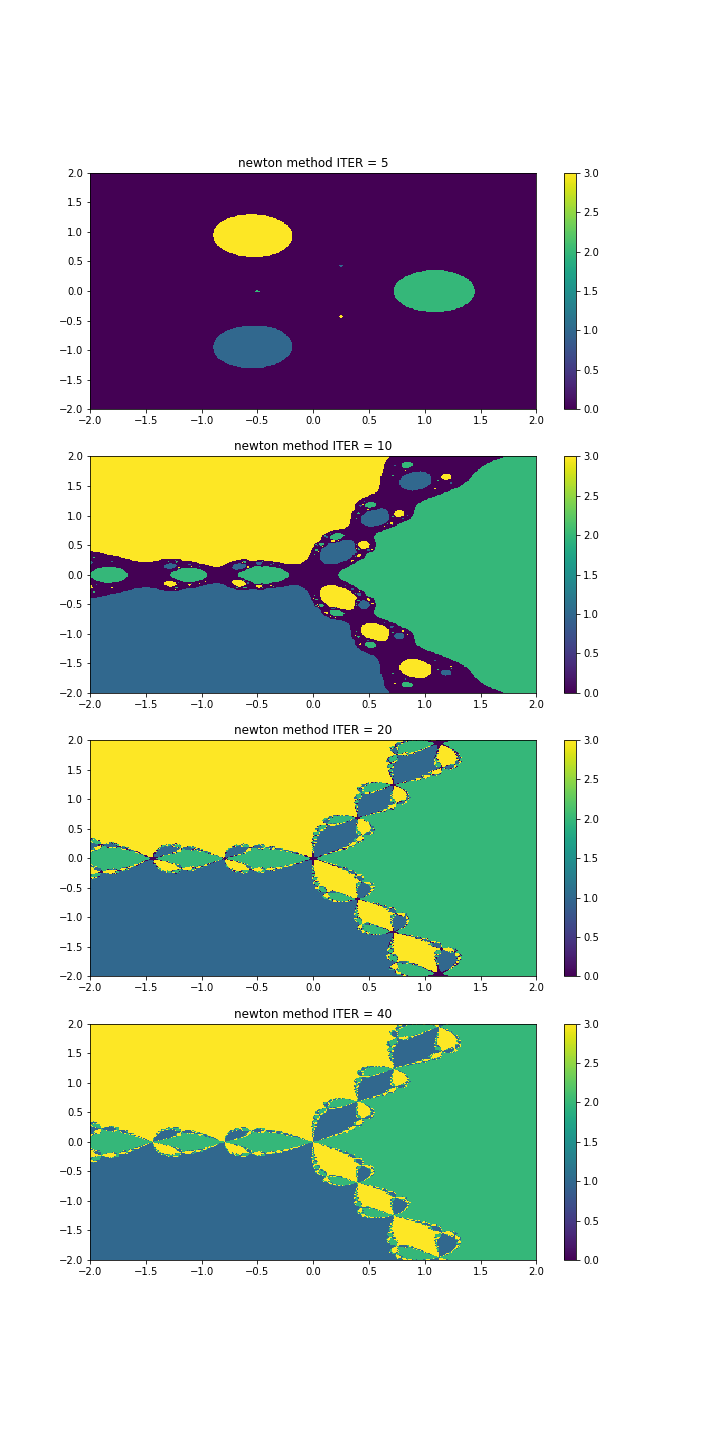

In [68]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import newton
from util import root_attraction, eps_eq
from math import sqrt

# options
N = 400
COUNT_ITERATIONS = [5, 10, 20, 40]
eps = 1e-15

# define function and roots
f = lambda z : z ** 3 - 1
fd= lambda z : 3 * z ** 2

roots = [
    complex(1, 0),
    complex(-1/2, sqrt(3)/2),
    complex(-1/2, -sqrt(3)/2),
]
assert all(map(lambda r: eps_eq(f(r), 0, eps), roots))

def newton_method(inter_cnt):
    return lambda z: newton.get_root(f, fd, z, inter_cnt)

# generation plot 
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)

# Z - array NxN, which contains index of route 
# or 0 if method didn't coverge 
Z = [ np.array([
        root_attraction(x, y, method=newton_method(iter_cnt), roots=roots, eps=eps) 
        for y in Y for x in X
        ]).reshape(N, N)
     for iter_cnt in COUNT_ITERATIONS]


# rendering 
fig, axs = plt.subplots(len(COUNT_ITERATIONS), 1, linewidth=6)

for i in range (0, len(COUNT_ITERATIONS)):
    ax= axs[i]
    c = ax.pcolormesh(X, Y, Z[i])
    ax.set_title(f'newton method ITER = {COUNT_ITERATIONS[i]}')
    fig.colorbar(c, ax=ax)


plt.rcParams['figure.figsize'] = [10, 20]
plt.show()